In [70]:
import kagglehub

# download latest version
path = kagglehub.dataset_download("rodolfofigueroa/spotify-12m-songs")
print("Path to dataset files:", path)

Path to dataset files: /Users/cjz/.cache/kagglehub/datasets/rodolfofigueroa/spotify-12m-songs/versions/1


In [71]:
import pandas as pd
import os

cols = ["name", "artists", "key", "mode", "tempo", "year"]
audio_feats = ["energy", "valence", "danceability", "acousticness"]
df = pd.read_csv(os.path.join(path, "tracks_features.csv"), usecols=cols+audio_feats).dropna()

df.describe()

,danceability,energy,key,mode,acousticness,valence,tempo,year
count,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06
mean,4.930560e-01,5.095357e-01,5.194155e+00,6.714595e-01,4.467521e-01,4.279866e-01,1.176343e+02,2.007328e+03
std,1.896692e-01,2.946840e-01,3.536727e+00,4.696827e-01,3.852013e-01,2.704845e-01,3.093707e+01,1.210118e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e-01,2.520000e-01,2.000000e+00,0.000000e+00,3.760000e-02,1.910000e-01,9.405400e+01,2.002000e+03
50%,5.010000e-01,5.240000e-01,5.000000e+00,1.000000e+00,3.890000e-01,4.030000e-01,1.167260e+02,2.009000e+03
75%,6.330000e-01,7.660000e-01,8.000000e+00,1.000000e+00,8.610000e-01,6.440000e-01,1.370460e+02,2.015000e+03
max,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,9.960000e-01,1.000000e+00,2.489340e+02,2.020000e+03


In [72]:
df[audio_feats].corr()

,energy,valence,danceability,acousticness
energy,1.000000,0.399531,0.283015,-0.796242
valence,0.399531,1.000000,0.563438,-0.268837
danceability,0.283015,0.563438,1.000000,-0.285748
acousticness,-0.796242,-0.268837,-0.285748,1.000000


In [73]:
df = df[df["year"] >= 1955]

df.info()

df["year"].value_counts().sort_index(ascending=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1201578 entries, 0 to 1204024
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   name          1201578 non-null  object 
 1   artists       1201578 non-null  object 
 2   danceability  1201578 non-null  float64
 3   energy        1201578 non-null  float64
 4   key           1201578 non-null  int64  
 5   mode          1201578 non-null  int64  
 6   acousticness  1201578 non-null  float64
 7   valence       1201578 non-null  float64
 8   tempo         1201578 non-null  float64
 9   year          1201578 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 100.8+ MB


year
1955      179
1956      508
1957      412
1958      473
1959      830
        ...  
2016    47427
2017    51308
2018    56167
2019    67276
2020    69725
Name: count, Length: 66, dtype: int64

In [74]:
# mapping from key(0-11) to Camelot
# 0 = C, 1 = C#, 2 = D, etc... 11 = B
major_map = {0: '8B', 1: '3B', 2: '10B', 3: '5B', 4: '12B', 5: '7B', 
             6: '2B', 7: '9B', 8: '4B', 9: '11B', 10: '6B', 11: '1B'}

minor_map = {0: '5A', 1: '12A', 2: '7A', 3: '2A', 4: '9A', 5: '4A', 
             6: '11A', 7: '6A', 8: '1A', 9: '8A', 10: '3A', 11: '10A'}

# create two helper series
major_col = df["key"].map(major_map)
minor_col = df["key"].map(minor_map)

# pick conditionally between two series based on mode col
df["camelot"] = major_col.where(df["mode"] == 1, minor_col)

df

,name,artists,danceability,energy,key,mode,acousticness,valence,tempo,year,camelot
0,Testify,['Rage Against The Machine'],0.470,0.978,7,1,0.02610,0.503,117.906,1999,9B
1,Guerrilla Radio,['Rage Against The Machine'],0.599,0.957,11,1,0.01290,0.489,103.680,1999,1B
2,Calm Like a Bomb,['Rage Against The Machine'],0.315,0.970,7,1,0.02340,0.370,149.749,1999,9B
3,Mic Check,['Rage Against The Machine'],0.440,0.967,11,0,0.16300,0.574,96.752,1999,10A
4,Sleep Now In the Fire,['Rage Against The Machine'],0.426,0.929,2,1,0.00162,0.539,127.059,1999,10B
...,...,...,...,...,...,...,...,...,...,...,...
1204020,Gospel of Juke,['FVLCRVM'],0.264,0.966,5,0,0.00935,0.415,159.586,2014,4A
1204021,Prism Visions,['FVLCRVM'],0.796,0.701,11,0,0.10400,0.781,121.980,2014,10A
1204022,Tokyo 360,['FVLCRVM'],0.785,0.796,9,0,0.03040,0.467,121.996,2014,8A
1204023,Yummy!,['FVLCRVM'],0.665,0.856,6,0,0.00007,0.227,124.986,2014,11A


In [75]:
# dict to store song ids from each camelot
camelot_lookup = df.groupby("camelot").groups

In [76]:
to_int16 = ["tempo", "year"]
to_float32 = [feat for feat in audio_feats if df[feat].dtype == "float64"]

try:
    df[to_int16] = df[to_int16].astype("int16")
    df[to_float32] = df[to_float32].astype("float32")
    df = df.drop(columns=["key", "mode"])
except:
    print("✅ Key and mode already dropped")

print(df.info())
df.head(3).T

<class 'pandas.core.frame.DataFrame'>
Index: 1201578 entries, 0 to 1204024
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   name          1201578 non-null  object 
 1   artists       1201578 non-null  object 
 2   danceability  1201578 non-null  float32
 3   energy        1201578 non-null  float32
 4   acousticness  1201578 non-null  float32
 5   valence       1201578 non-null  float32
 6   tempo         1201578 non-null  int16  
 7   year          1201578 non-null  int16  
 8   camelot       1201578 non-null  object 
dtypes: float32(4), int16(2), object(3)
memory usage: 59.6+ MB
None


,0,1,2
name,Testify,Guerrilla Radio,Calm Like a Bomb
artists,['Rage Against The Machine'],['Rage Against The Machine'],['Rage Against The Machine']
danceability,0.47,0.599,0.315
energy,0.978,0.957,0.97
acousticness,0.0261,0.0129,0.0234
valence,0.503,0.489,0.37
tempo,117,103,149
year,1999,1999,1999
camelot,9B,1B,9B


{'10A': 47020, '10B': 111771, '11A': 29805, '11B': 80361, '12A': 26324, '12B': 48127, '1A': 15500, '1B': 34368, '2A': 11202, '2B': 33616, '3A': 34859, '3B': 69859, '4A': 35428, '4B': 49591, '5A': 29221, '5B': 28377, '6A': 30905, '6B': 42056, '7A': 32618, '7B': 64252, '8A': 52742, '8B': 120013, '9A': 49384, '9B': 124179}


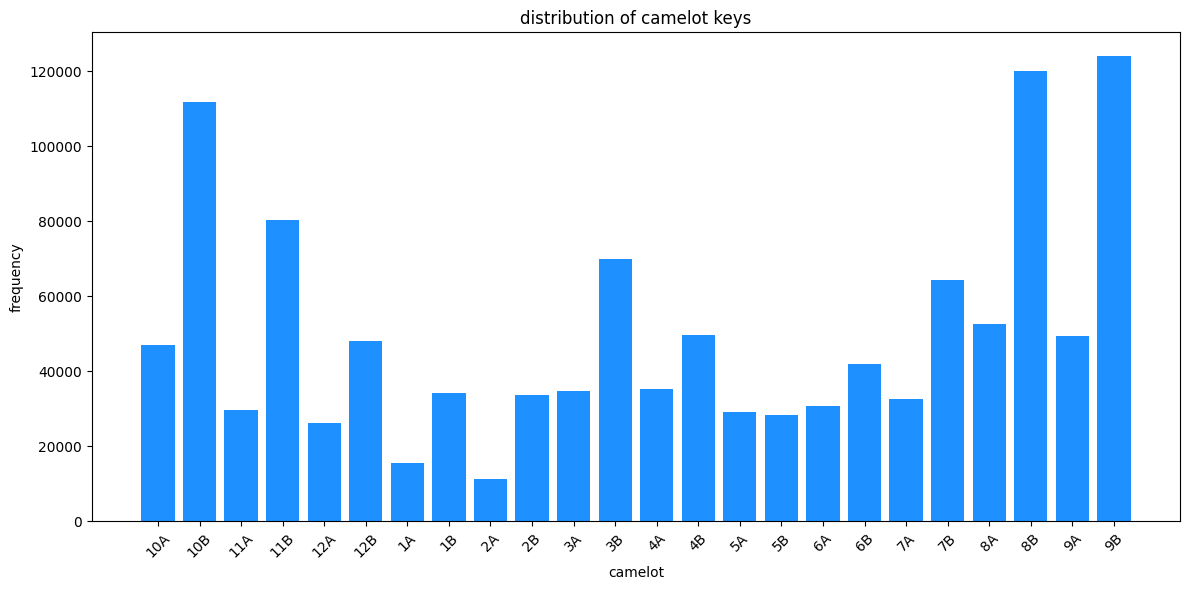

In [77]:
import matplotlib.pyplot as plt

# dictionary storing number of songs in each camelot
sizes = {key: len(camelot_lookup[key]) for key in camelot_lookup}

print(sizes)

plt.figure(figsize=(12,6))
plt.bar(sizes.keys(), sizes.values(), color="dodgerblue")
plt.xlabel("camelot")
plt.xticks(rotation=45)
plt.ylabel("frequency")
plt.title("distribution of camelot keys")
plt.tight_layout()
plt.show()

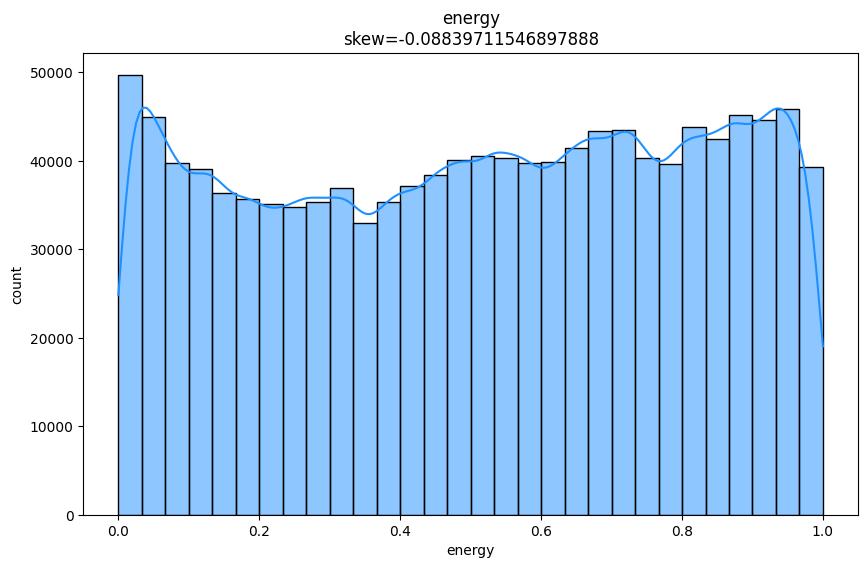

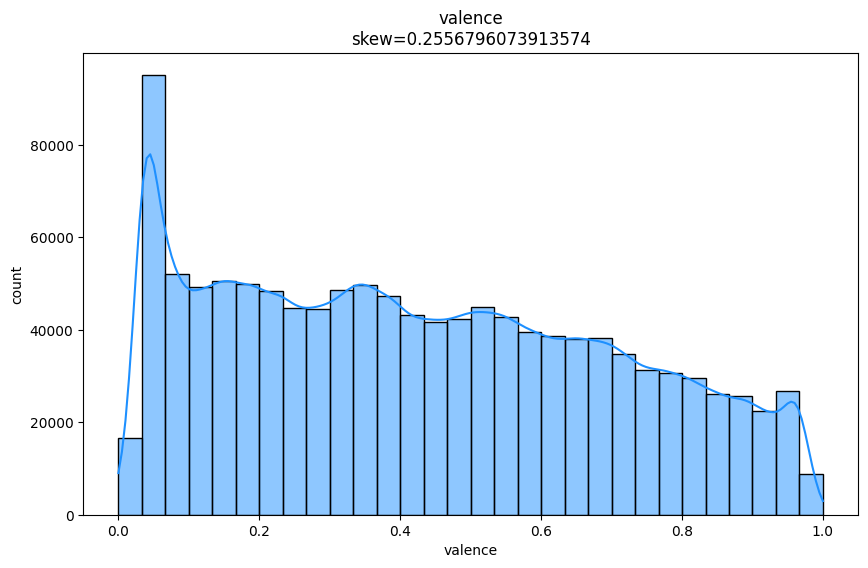

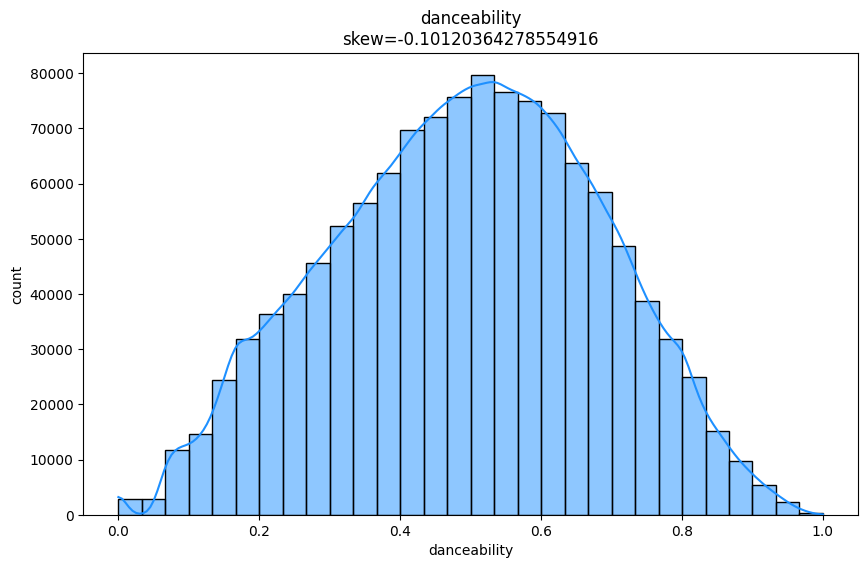

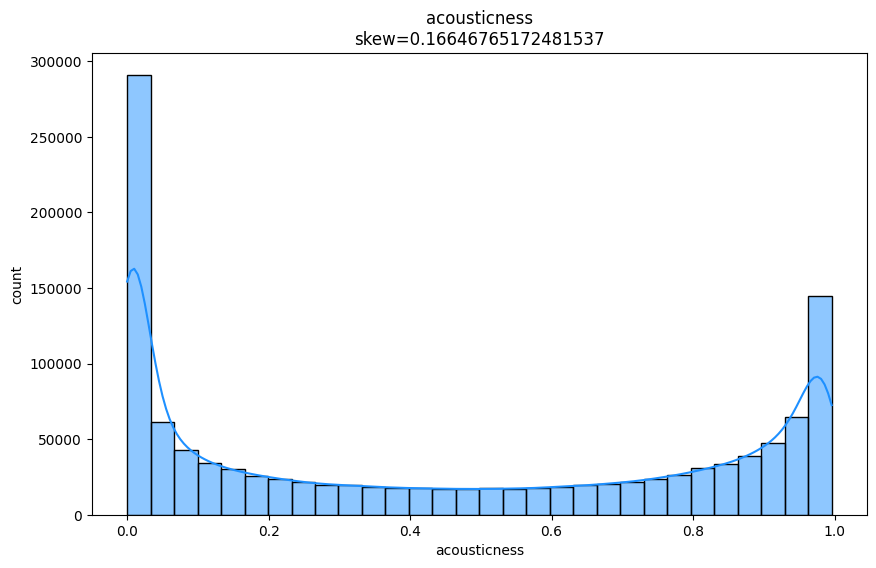

In [78]:
import seaborn as sns
import numpy as np

for feat in audio_feats:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feat], bins=30, kde=True, color="dodgerblue")
    plt.title(f"{feat}\nskew={df[feat].skew()}")
    plt.ylabel("count")
    
    plt.show()

In [79]:
valence_transforms = 0

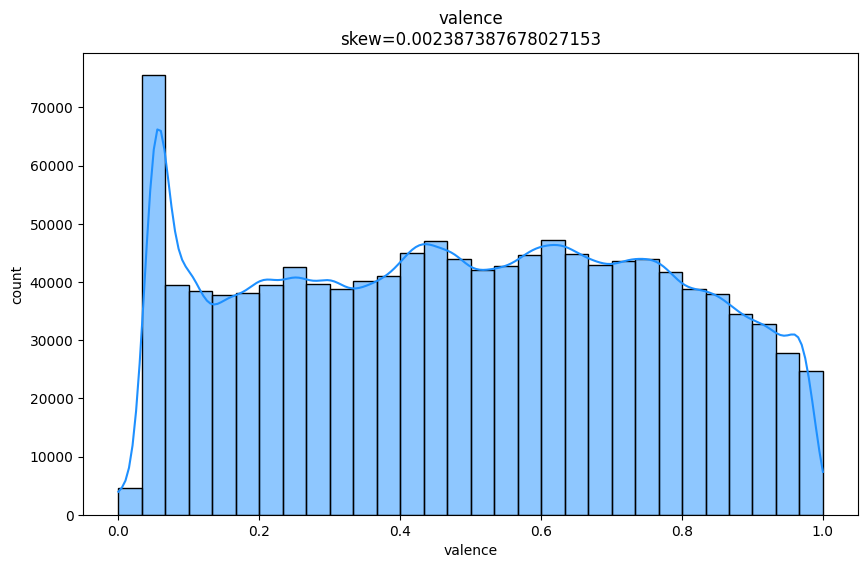

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# yeo-johnson stabilizes valence spike, scaler brings it back to range 0-1
vibe_transformer = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('scaler', MinMaxScaler())
])

if valence_transforms == 0:
    df['valence'] = vibe_transformer.fit_transform(df[['valence']])
    valence_transforms = 1
else:
    print("✅ Valence already transformed")

plt.figure(figsize=(10,6))
sns.histplot(df["valence"], bins=30, kde=True, color="dodgerblue")
plt.title(f"{"valence"}\nskew={df["valence"].skew()}")
plt.ylabel("count")

plt.show()

year
2020    69725
2019    67276
2006    56945
2007    56287
2018    56167
        ...  
1961      623
1956      508
1958      473
1957      412
1955      179
Name: count, Length: 66, dtype: int64


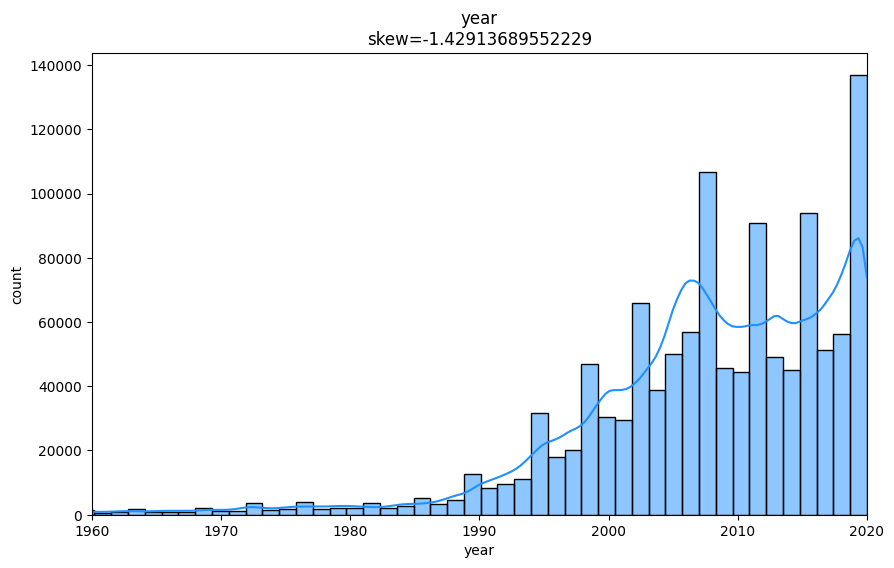

613376
588202


In [81]:
print(df["year"].value_counts())
plt.figure(figsize=(10,6))
plt.xlim(1960, 2020)
sns.histplot(df["year"], bins=50, kde=True, color="dodgerblue")
plt.title(f"{"year"}\nskew={df["year"].skew()}")
plt.ylabel("count")

plt.show()

print(len(df[df["year"] >= 2009]))
print(len(df[df["year"] < 2009]))

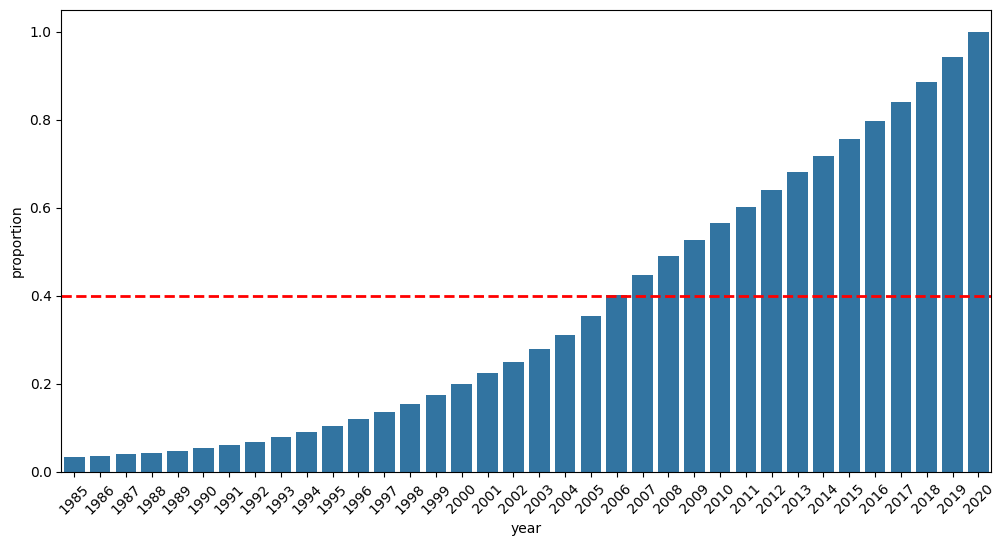

split year: 2006


In [82]:
props = df["year"].value_counts(normalize=True).sort_index(ascending=True)
props_cumsum = props.cumsum()

props_cumsum = pd.Series(props_cumsum[30:], index=props.keys()[30:])

plt.figure(figsize=(12,6))
sns.barplot(props_cumsum)
plt.axhline(y=0.4, color='red', linestyle='--', linewidth=2)
plt.xticks(rotation=45)
plt.show()

split_year = (props_cumsum > 0.4).idxmax() # find year that splits dataset into 40% of songs released earlier, 60% released later
print(f"split year: {split_year}")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201578 entries, 0 to 1204024
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   name          1201578 non-null  object 
 1   artists       1201578 non-null  object 
 2   danceability  1201578 non-null  float32
 3   energy        1201578 non-null  float32
 4   acousticness  1201578 non-null  float32
 5   valence       1201578 non-null  float32
 6   tempo         1201578 non-null  int16  
 7   year          1201578 non-null  int16  
 8   camelot       1201578 non-null  object 
dtypes: float32(4), int16(2), object(3)
memory usage: 59.6+ MB


In [105]:
audio_feats = ["energy", "valence", "danceability", "acousticness"]

def get_harmonic_neighbors(camelot: str) -> list[str]:
    neighbors = []
    key = int(camelot[:-1])
    mode = camelot[-1]
    
    neighbors.append(camelot)
    neighbors.append(f"{((key - 2) % 12) + 1}{mode}")
    neighbors.append(f"{(key % 12) + 1}{mode}")
    other_mode = "A" if mode == "B" else "B"
    neighbors.append(f"{key}{other_mode}")
    
    return neighbors

# function to get valid database of song pool to use for distance calculation rankings
# TODO: maybe add error check / functionalities in case restrictions leave too few rows (songs)?
def get_pool_df(song_idx: int, 
                time_period: str) -> list[int]: # time period can be "modern" or "throwback"
    camelot = df.at[song_idx, "camelot"]
    harmonic_neighbors = get_harmonic_neighbors(camelot)
    
    pool_indices = []
    
    for camelot in harmonic_neighbors:
        pool_indices.extend(camelot_lookup[camelot])
        
    filter_cols = ["tempo", "year", "camelot"]
    
    curr_df = df.loc[pool_indices, audio_feats + filter_cols].copy() 
    song_idx_vec = pd.DataFrame(curr_df.loc[song_idx:song_idx]) # save vector for current song
        
    # time period filtering - split dataframe at year split_year
    if time_period == "modern":
        curr_df = curr_df[curr_df["year"] >= split_year]
    elif time_period == "throwback":
        curr_df = curr_df[curr_df["year"] < split_year]
        
    # tempo filtering - range of 30 bpm
    curr_tempo = df.at[song_idx, "tempo"]
    curr_df = curr_df[(curr_df["tempo"] >= curr_tempo * 0.90) & (curr_df["tempo"] <= curr_tempo * 1.1)]
    
    if song_idx not in curr_df.index:
        curr_df = pd.concat([song_idx_vec, curr_df])
    
    curr_df = curr_df.drop(columns=filter_cols)
        
    return curr_df

get_harmonic_neighbors("12A")
get_pool_df(5, "modern")

,energy,valence,danceability,acousticness
5,0.848,0.257974,0.298,0.053800
356,0.137,0.138857,0.568,0.894000
649,0.799,0.870765,0.564,0.397000
1161,0.383,0.709876,0.671,0.785000
1170,0.589,0.975539,0.642,0.629000
...,...,...,...,...
1203450,0.780,0.831855,0.867,0.315000
1203759,0.788,0.979163,0.584,0.003940
1203803,0.872,0.489301,0.233,0.000535
1203886,0.841,0.938011,0.657,0.002930


In [111]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def get_hybrid_sim_recs(song_idx: int, 
                        time_period: str,
                        output_num: int = None) -> list[tuple]:
    
    # get filtered pool
    pool_df = get_pool_df(song_idx, time_period)
    # feature engineering to take into account interplay between features
    pool_df["energy*valence"] = pool_df["energy"] * pool_df["valence"] 
    
    if pool_df.empty:
        return []

    # song pool
    pool_matrix = pool_df.values
    
    # clean current song vector
    curr_song_vec = pool_df.loc[song_idx, audio_feats + ["energy*valence"]].values.reshape(1, -1)
    
    # calculate cosine similarities
    cos_sim = cosine_similarity(curr_song_vec, pool_matrix)[0]
    
    # calculate euclidean similarities with weighting
    euc_weights = np.array([1.5, 1.0, 1.3, 1.2, 1.2]) # energy, valence, danceability, acousticness, energy*valence
    euc_dist = euclidean_distances(curr_song_vec * euc_weights, pool_matrix * euc_weights)[0]
    euc_sim = 1 / (1 + euc_dist)
    
    # compute score
    hybrid_scores = np.power((0.4 * cos_sim) + (0.6 * euc_sim), 3)
    hybrid_scores = np.clip(hybrid_scores, 0, 1).astype("float16")
    
    # create list of tuples using original indices from pool_df and the scores
    combined = list(zip(pool_df.index, hybrid_scores))
    
    # sort desc by score (second element in tuple) - O(nlogn) for filtered pool
    sorted_recs = sorted(combined, key=lambda x: x[1], reverse=True)
    
    if output_num == None:
        return sorted_recs[1:]
    return sorted_recs[1:output_num+1]
    
get_hybrid_sim_recs(64, "throwback", 10)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: in

[(1077348, np.float16(0.919)),
 (113853, np.float16(0.9126)),
 (79271, np.float16(0.91)),
 (82815, np.float16(0.881)),
 (287521, np.float16(0.8804)),
 (239192, np.float16(0.8774)),
 (84241, np.float16(0.8755)),
 (23229, np.float16(0.874)),
 (1043351, np.float16(0.8735)),
 (647400, np.float16(0.8555))]